# Workshop 4
## Manolo Ramírez Pintor
## A01706155

## 4 Interpreting coefficients with an example
Let’s work with a market regression model for ALFA using data from Jan 2018 to July 2022.
### 4.1 Data collection and return calculation


In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

Visualizing linear relationship

We do a scatter plot including the regression line:

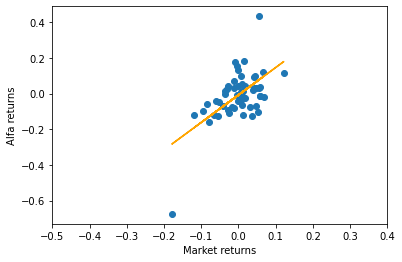

In [2]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

c:\Users\Manolo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


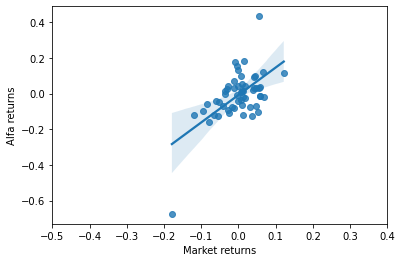

In [3]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

**WHAT DOES THE PLOT TELL YOU? BRIEFLY EXPLAIN**

IT TELLS ME THAT THERE IS A POSITIVE RELATION BETWEEN ALFA AND IPC. THAT MEANS, THAT IF IPC INCREASES, I WOULD EXPECT THAT ALFA HAVE AN INCREASE, AS WELL. HOWEVER, I ALSO SEE SOME DOTS FAR AWAY FROM THE REGRESSION LINE, WHICH MEANS THAT SUCH POSITIVE RELATION IS NOT DETERMINISTIC.

IT SEEMS THAT THIS STOCK IS VERY SENSITIVE TO CHANGES IN THE MARKET RETURN SINCE THE SLOPE OF THE LINE SEEMS TO BE HIGHER THAN 1 (HIGHER THAN 45 DEGREES). FOR EACH +1% CHANGE IN THE MARKET RETURN, IT SEEMS THAT THE STOCK RETURNS MOVES MORE THAN +1%. BUT THE SAME WOULD HAPPEN IN NEGATIVE CHANGES; WHEN THE MARKET RETURN LOSES 1% (-1%), THEN THE STOCK RETURN IS EXPECTED TO LOSE MORE THAN 1%! THEN IT SEEMS THAT THE STOCK RETURN IS RISKIER THAN THE MARKET. WE WILL CHECK THIS BY LOOKING AT BETA1 IN THE REGRESSION OUTPUT!

## 4.2 Running the regression with the OLS method


In [4]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.69
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.87e-06
Time:                        09:16:37   Log-Likelihood:                 43.927
No. Observations:                  55   AIC:                            -83.85
Df Residuals:                      53   BIC:                            -79.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0079      0.015     -0.526      0.6

In [5]:
# Another way to run the same model using the ols function (instead of the OLS function):
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()

print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.69
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.87e-06
Time:                        09:16:52   Log-Likelihood:                 43.927
No. Observations:                  55   AIC:                            -83.85
Df Residuals:                      53   BIC:                            -79.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0079      0.015     -0.526      0.6

We can also estimate the OLS beta coefficients using matrix algebra:



In [6]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00786281,  1.53894511])

Writing the regression equation

The regression equation is: E[ALFAret]= -0.00783657539010133 + 1.5392443335106285*MXXret.